<a href="https://colab.research.google.com/github/YoofKhaneja/Heart_Disease_Prediction/blob/master/Codes/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration and Logistic Regression

## Import the Standard Libraries

In [0]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

## Description of the dataset

In [4]:
url = 'https://raw.githubusercontent.com/YoofKhaneja/Heart_Disease_Prediction/master/Codes/framingham.csv'
hd = pd.read_csv(url)
hd.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## First 10 values from the dataset

In [5]:
hd.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


## Total samples and attributes in the dataset

In [6]:
print('Total patients: ', hd.shape[0])
print('Total attributes: ', hd.shape[1] - 1)
print('Number of labels: ', 1, '(', hd.columns[15], ')')

Total patients:  4240
Total attributes:  15
Number of labels:  1 ( TenYearCHD )


## Some charts and plots

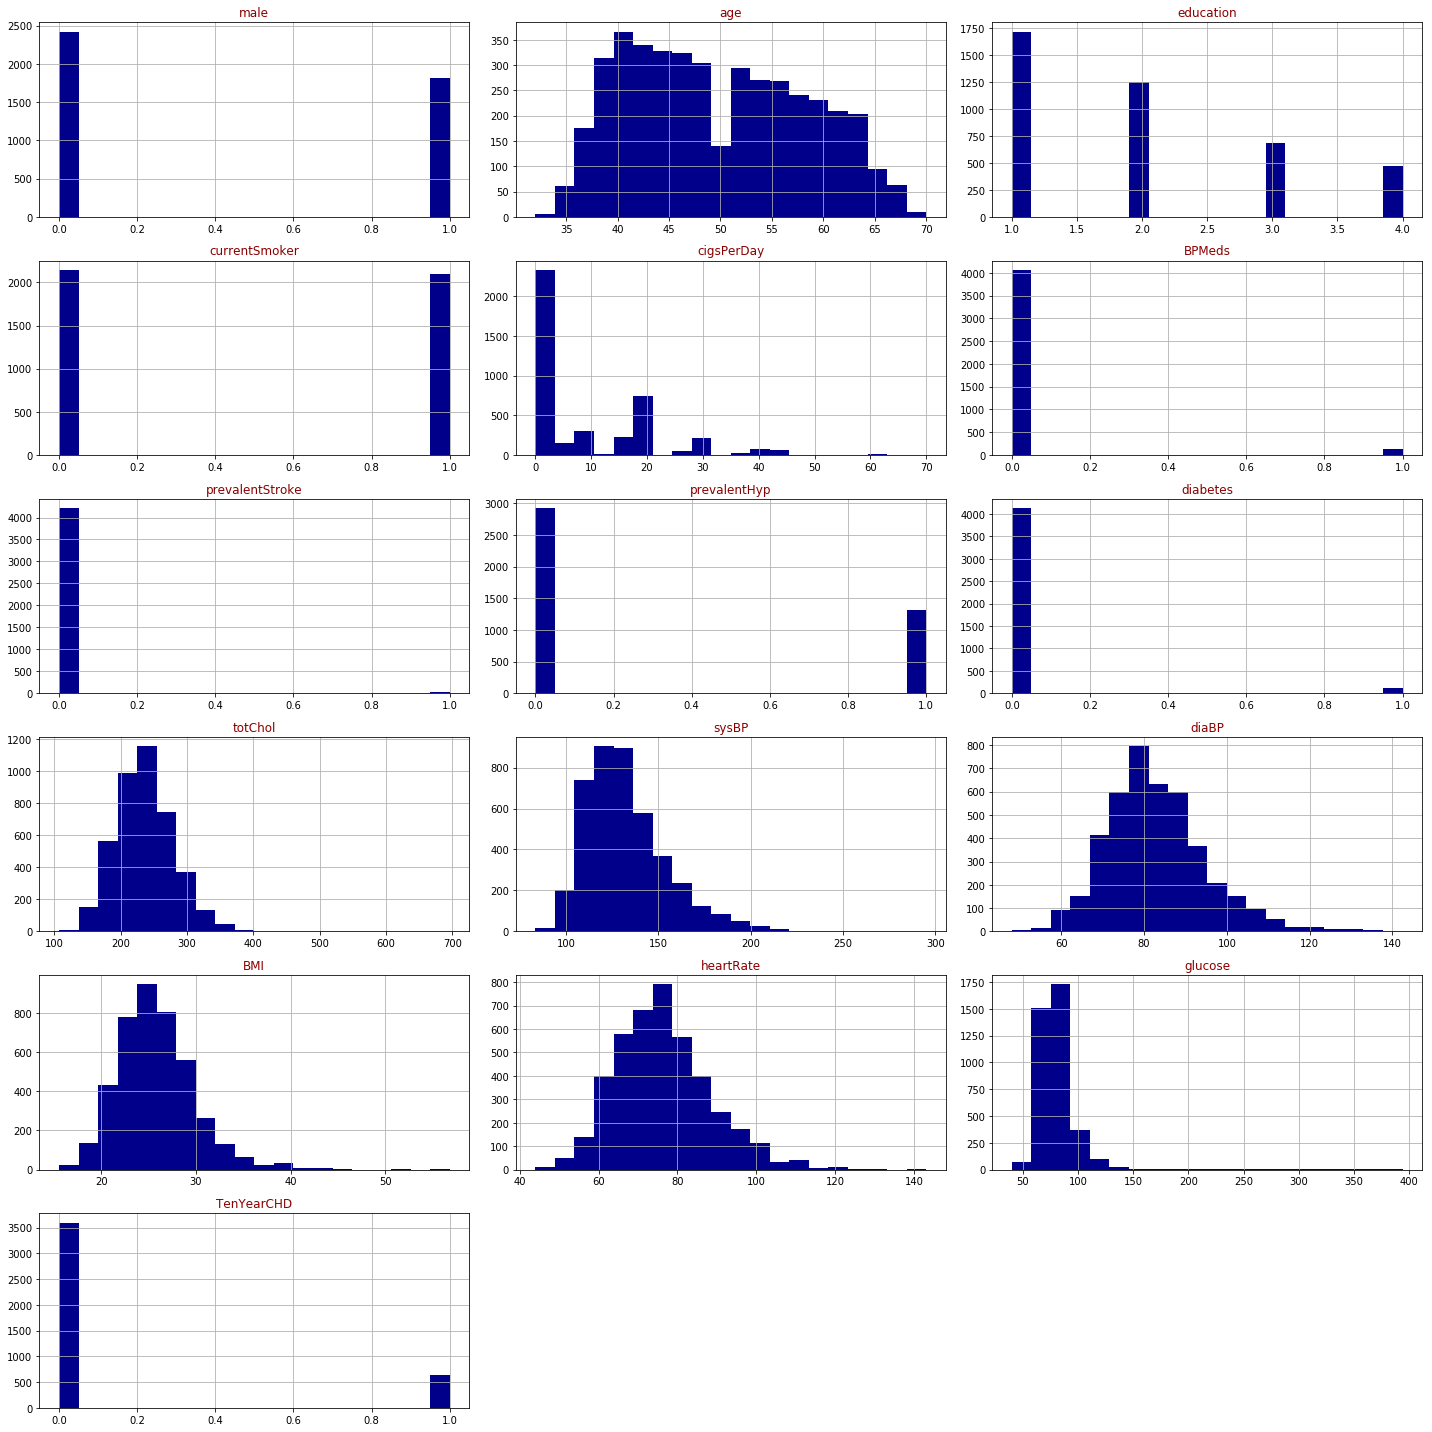

In [7]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize = (20, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins = 20, ax = ax, facecolor = 'DarkBlue')
        ax.set_title(feature, color = 'DarkRed')
    fig.tight_layout()  
    plt.show()
draw_histograms(hd, hd.columns, 6, 3)

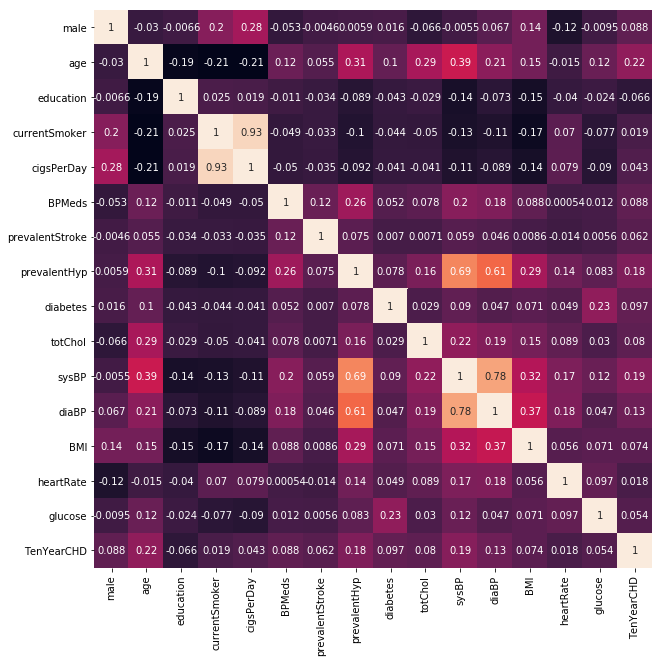

In [8]:
corr = hd.corr(method = 'spearman')

plt.figure(figsize = (10, 16))
sns.heatmap(corr, square = True, cbar = False, annot = True)

## Information about missing data
### Column-wise count of missing values and count of rows with values missing

In [9]:
print('Missing values: ')
print(hd.isnull().sum())
mv = np.array(hd.isnull().sum())
ta = 0
for t in mv:
    ta += t
print('\nTotal missing attributes: ', ta)
tr = 0
for i in hd.isnull().sum(axis = 1):
    if i > 0:
        tr += 1
print('\nTotal rows with missing data: ', tr)

Missing values: 
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Total missing attributes:  645

Total rows with missing data:  582


## Distribution of data based on the label

In [10]:
from collections import Counter
chdc = Counter(hd['TenYearCHD'])
print('Total patients at risk of CHD: ', chdc[1])
print('Total patients not at risk of CHD: ', chdc[0])

Total patients at risk of CHD:  644
Total patients not at risk of CHD:  3596


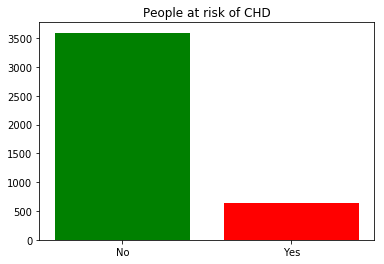

In [11]:
import matplotlib.pyplot as plt
plt.bar(list(chdc.keys()), chdc.values(), color = ['g', 'r'])
plt.xticks(list(chdc.keys()), ['No', 'Yes'])
plt.title('People at risk of CHD')
plt.show()

## Dropping rows with missing values

In [12]:
hd.dropna(axis = 0, inplace = True)
hd.shape

(3658, 16)

## Using Random Forest to determine feature importance

In [13]:
from sklearn.ensemble import RandomForestRegressor as RFR
rfr = RFR(random_state = 1, n_estimators = 1000, n_jobs = -1)
x = hd.iloc[:, :-1]
y = hd.iloc[:, -1]
rfr.fit(x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

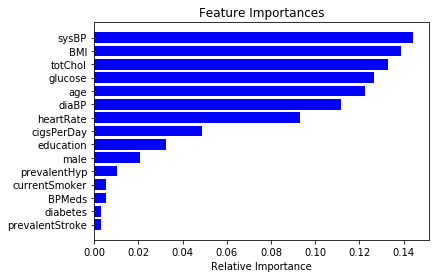

In [14]:
features = hd.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Verifying the results of the Random Forest Classifier
### The first Logistic Regression model is trained on all features, the second one is trained on the most important features. We binarize the output to tackle the class imbalance.

In [0]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR(C = 0.01, fit_intercept = True, random_state = 0, max_iter = 1000, solver = 'lbfgs')

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 0)

### All features

In [17]:
lr.fit(x_train, y_train)
y1 = lr.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y1)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, y1))
conf_matrix

Accuracy: 0.837431693989071


,Predicted: 0,Predicted: 1
Actual:0,605,4
Actual:1,115,8


In [18]:
lr.coef_

array([[ 0.19779519,  0.05783696, -0.05167039,  0.01014491,  0.02237881,
         0.01402981,  0.0151598 ,  0.06651322,  0.00458291,  0.0021019 ,
         0.01330211,  0.00419099,  0.01601498, -0.00703436,  0.00939375]])

In [19]:
yprob = lr.predict_proba(x_test)
yprob[10:20]

array([[0.87066127, 0.12933873],
       [0.79637612, 0.20362388],
       [0.90223441, 0.09776559],
       [0.73440958, 0.26559042],
       [0.89189561, 0.10810439],
       [0.93117352, 0.06882648],
       [0.85384419, 0.14615581],
       [0.8134655 , 0.1865345 ],
       [0.83544928, 0.16455072],
       [0.90481817, 0.09518183]])

In [20]:
from sklearn.preprocessing import binarize
ypred = binarize(yprob, 0.15)[:, 1]
cm = confusion_matrix(y_test, ypred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, ypred))
conf_matrix

Accuracy: 0.6912568306010929


,Predicted: 0,Predicted: 1
Actual:0,413,196
Actual:1,30,93


### Selected features

In [0]:
x_train = x_train[['sysBP', 'BMI', 'totChol', 'glucose', 'age', 'diaBP', 'heartRate', 'cigsPerDay', 'male', 'education']]
x_test = x_test[['sysBP', 'BMI', 'totChol', 'glucose', 'age', 'diaBP', 'heartRate', 'cigsPerDay', 'male', 'education']]

In [22]:
lr.fit(x_train, y_train)
y1 = lr.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y1)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, y1))
conf_matrix

Accuracy: 0.837431693989071


,Predicted: 0,Predicted: 1
Actual:0,605,4
Actual:1,115,8


In [23]:
lr.coef_

array([[ 0.01397022,  0.01665572,  0.00211559,  0.00942525,  0.05809972,
         0.0046829 , -0.00700873,  0.02265291,  0.19877076, -0.05087479]])

In [24]:
yprob = lr.predict_proba(x_test)
yprob[10:20]

array([[0.8717414 , 0.1282586 ],
       [0.79583357, 0.20416643],
       [0.90499862, 0.09500138],
       [0.74222228, 0.25777772],
       [0.8963267 , 0.1036733 ],
       [0.93053166, 0.06946834],
       [0.85046677, 0.14953323],
       [0.81556694, 0.18443306],
       [0.84355737, 0.15644263],
       [0.90296714, 0.09703286]])

In [25]:
from sklearn.preprocessing import binarize
ypred = binarize(yprob, 0.15)[:, 1]
cm = confusion_matrix(y_test, ypred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, ypred))
conf_matrix

Accuracy: 0.6926229508196722


,Predicted: 0,Predicted: 1
Actual:0,415,194
Actual:1,31,92


## Using SMOTE and NearMiss to handle class imbalance

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 0)

In [27]:
from imblearn.over_sampling import SMOTE as smote
smt = smote()
x_train, y_train = smt.fit_sample(x_train, y_train)
lr.fit(x_train, y_train)
ypred = lr.predict(x_test)
cm = confusion_matrix(y_test, ypred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, ypred))
conf_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Accuracy: 0.6775956284153005


,Predicted: 0,Predicted: 1
Actual:0,403,206
Actual:1,30,93


In [28]:
from imblearn.under_sampling import NearMiss as NM
nm = NM()
x_train, y_train = nm.fit_sample(x_train, y_train)
lr.fit(x_train, y_train)
ypred = lr.predict(x_test)
cm = confusion_matrix(y_test, ypred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, ypred))
conf_matrix

Accuracy: 0.6775956284153005


,Predicted: 0,Predicted: 1
Actual:0,403,206
Actual:1,30,93


## Applying PCA

Text(0, 0.5, 'cumulative explained variance')

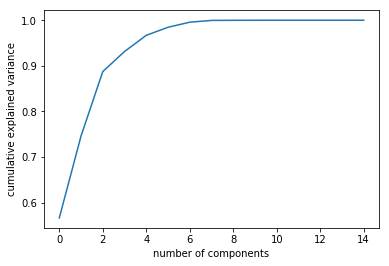

In [29]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [30]:
print(pca.singular_values_)
x_new = pd.DataFrame(pca.transform(x))
x_new.head()

[2701.4791594  1522.05971207 1350.20434608  752.78841012  676.71190325
  477.69721525  378.96179416  223.35406984   60.2220379    27.5018835
   19.72608548   18.76259199    9.8797909     7.71991024    4.5243208 ]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-46.665116,-16.095990,13.962381,-2.255067,12.919410,-5.156986,3.244143,3.027121,1.928771,0.710328,-0.050407,0.186686,0.030141,-0.003192,0.000743
1,11.292231,-11.433971,4.269821,5.971960,21.910111,-3.365265,-1.578329,2.941396,0.074603,-0.225272,0.191885,0.210170,0.010175,-0.002076,-0.001216
2,6.243977,-14.393647,-2.843224,8.150887,-6.318626,1.440590,0.577322,0.329225,-1.002917,0.412402,0.234476,-0.185211,0.010997,0.020618,-0.002480
3,-6.950960,29.903722,-1.869390,7.175795,-24.598665,7.388266,-8.903899,1.047610,1.270323,-0.951013,-0.370959,0.145929,-0.124794,-0.119527,-0.006936
4,47.014298,-6.723251,8.249860,17.209179,-2.188329,-2.197829,0.265285,-2.721717,0.850870,-0.549438,0.263035,0.003786,-0.013834,-0.029210,0.004161


In [31]:
x_pca = x_new.iloc[:, :8]
y_pca = y
x_pca.head()

,0,1,2,3,4,5,6,7
0,-46.665116,-16.095990,13.962381,-2.255067,12.919410,-5.156986,3.244143,3.027121
1,11.292231,-11.433971,4.269821,5.971960,21.910111,-3.365265,-1.578329,2.941396
2,6.243977,-14.393647,-2.843224,8.150887,-6.318626,1.440590,0.577322,0.329225
3,-6.950960,29.903722,-1.869390,7.175795,-24.598665,7.388266,-8.903899,1.047610
4,47.014298,-6.723251,8.249860,17.209179,-2.188329,-2.197829,0.265285,-2.721717


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y_pca, test_size = .20, random_state = 0)
lr.fit(x_train, y_train)
ypred = lr.predict(x_test)
cm = confusion_matrix(y_test, ypred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, ypred))
conf_matrix

Accuracy: 0.8346994535519126


,Predicted: 0,Predicted: 1
Actual:0,605,4
Actual:1,117,6


In [33]:
yprob = lr.predict_proba(x_test)
ypred = binarize(yprob, 0.15)[:, 1]
cm = confusion_matrix(y_test, ypred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, ypred))
conf_matrix

Accuracy: 0.6871584699453552


,Predicted: 0,Predicted: 1
Actual:0,411,198
Actual:1,31,92


## Trying to standardize the data

In [0]:
hd_copy = hd.copy(deep = True)

In [0]:
hd_copy['age'] = pd.cut(hd_copy['age'], 5, labels = [1, 2, 3, 4, 5])
hd_copy['cigsPerDay'] = pd.cut(hd_copy['cigsPerDay'], 6, labels = [1, 2, 3, 4, 5, 6])
hd_copy['totChol'] = pd.cut(hd_copy['totChol'], 13, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
hd_copy['sysBP'] = pd.cut(hd_copy['sysBP'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
hd_copy['diaBP'] = pd.cut(hd_copy['diaBP'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
hd_copy['BMI'] = pd.cut(hd_copy['BMI'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
hd_copy['heartRate'] = pd.cut(hd_copy['heartRate'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
hd_copy['glucose'] = pd.cut(hd_copy['glucose'], 15, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

In [36]:
hd.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [37]:
hd_copy.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,1,4.0,0,1,0.0,0,0,0,3,2,2,3,3,2,0
1,0,2,2.0,0,1,0.0,0,0,0,4,2,3,4,5,2,0
2,1,3,1.0,1,2,0.0,0,0,0,4,3,3,3,3,2,0
3,0,4,3.0,1,3,0.0,0,1,0,3,4,4,4,2,3,1
4,0,2,3.0,1,2,0.0,0,0,0,5,3,4,2,4,2,0


### SMOTE

In [40]:
xt = hd_copy.iloc[:, :-1]
yt = hd_copy.iloc[:, -1] 
x_train, x_test, y_train, y_test = train_test_split(xt, yt, test_size = .20, random_state = 0)
x_train, y_train = smt.fit_sample(x_train, y_train)
lr.fit(x_train, y_train)
ypred = lr.predict(x_test)
cm = confusion_matrix(y_test, ypred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, ypred))
conf_matrix

Accuracy: 0.662568306010929


,Predicted: 0,Predicted: 1
Actual:0,395,214
Actual:1,33,90


### NearMiss

In [51]:
xt = hd_copy.iloc[:, :-1]
yt = hd_copy.iloc[:, -1] 
x_train, x_test, y_train, y_test = train_test_split(xt, yt, test_size = .20, random_state = 0)
x_train, y_train = nm.fit_sample(x_train, y_train)
lr.fit(x_train, y_train)
ypred = lr.predict(x_test)
cm = confusion_matrix(y_test, ypred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, ypred))
conf_matrix

Accuracy: 0.6120218579234973


,Predicted: 0,Predicted: 1
Actual:0,359,250
Actual:1,34,89


## PCA

In [43]:
xt = hd_copy.iloc[:, :-1]
yt = hd_copy.iloc[:, -1] 
pca.fit(xt)
xt = pd.DataFrame(pca.transform(xt))
x_train, x_test, y_train, y_test = train_test_split(xt, yt, test_size = .20, random_state = 0)
lr.fit(x_train, y_train)
ypred = lr.predict(x_test)
yprob = lr.predict_proba(x_test)
ypred = binarize(yprob, 0.15)[:, 1]
cm = confusion_matrix(y_test, ypred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, ypred))
conf_matrix

Accuracy: 0.6693989071038251


,Predicted: 0,Predicted: 1
Actual:0,399,210
Actual:1,32,91


# Imputation of Missing Values and Application of Logistic Regression


## Imputation

In [0]:
url = 'https://raw.githubusercontent.com/YoofKhaneja/Heart_Disease_Prediction/master/Codes/framingham.csv'
hd = pd.read_csv(url)

In [47]:
import random
hd.BPMeds = hd.BPMeds.fillna(0)
edu = [1, 2, 3, 4]
c = 0
for i in range(len(hd.education)):
    if hd.education[i] not in edu:
        t = random.randint(1, 4)
        hd.education[i] = t
print(hd.isnull().sum())

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [48]:
from fancyimpute import IterativeImputer

hdi = pd.DataFrame(IterativeImputer().fit_transform(hd))

hdi.columns = hd.columns

Using TensorFlow backend.


## Formatting

In [0]:
hd_ = hdi.copy(deep = True)
hd_['age'] = pd.cut(hd_['age'], 
 
                    5, 
                    labels = [1, 2, 3, 4, 5])
hd_['cigsPerDay'] = pd.cut(hd_['cigsPerDay'], 
                           6, 
                           labels = [1, 2, 3, 4, 5, 6])
hd_['totChol'] = pd.cut(hd_['totChol'], 
                        13, 
                        labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
hd_['sysBP'] = pd.cut(hd_['sysBP'], 
                      10, 
                      labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
hd_['diaBP'] = pd.cut(hd_['diaBP'], 
                      8, 
                      labels = [1, 2, 3, 4, 5, 6, 7, 8])
hd_['BMI'] = pd.cut(hd_['BMI'], 
                    10, 
                    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
hd_['heartRate'] = pd.cut(hd_['heartRate'], 
                          8, 
                          labels = [1, 2, 3, 4, 5, 6, 7, 8])
hd_['glucose'] = pd.cut(hd_['glucose'], 
                        15, 
                        labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

hd_['age'] = hd_['age'].apply(lambda x: round(x*0.2, 2))
hd_['education'] = hd_['education'].apply(lambda x: round(x*0.25, 2))
hd_['cigsPerDay'] = hd_['cigsPerDay'].apply(lambda x: round(x*0.16, 2))
hd_['totChol'] = hd_['totChol'].apply(lambda x: round(x*0.077, 2))
hd_['sysBP'] = hd_['sysBP'].apply(lambda x: round(x*0.1, 2))
hd_['diaBP'] = hd_['diaBP'].apply(lambda x: round(x*0.125, 2))
hd_['BMI'] = hd_['BMI'].apply(lambda x: round(x*0.1, 2))
hd_['heartRate'] = hd_['heartRate'].apply(lambda x: round(x*0.125, 2))
hd_['glucose'] = hd_['glucose'].apply(lambda x: round(x*0.067, 2))

## SMOTE

In [50]:
hd_x = hd_.iloc[:, :-1]
hd_y = hd_.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(hd_x, hd_y, test_size = .20, random_state = 0)
x_train, y_train = smt.fit_sample(x_train, y_train)
lr.fit(x_train, y_train)
ypred = lr.predict(x_test)
cm = confusion_matrix(y_test, ypred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, ypred))
conf_matrix

Accuracy: 0.6367924528301887


,Predicted: 0,Predicted: 1
Actual:0,467,255
Actual:1,53,73


## NearMiss

In [52]:
hd_x = hd_.iloc[:, :-1]
hd_y = hd_.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(hd_x, hd_y, test_size = .20, random_state = 0)
x_train, y_train = nm.fit_sample(x_train, y_train)
lr.fit(x_train, y_train)
ypred = lr.predict(x_test)
cm = confusion_matrix(y_test, ypred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, ypred))
conf_matrix

Accuracy: 0.5825471698113207


,Predicted: 0,Predicted: 1
Actual:0,421,301
Actual:1,53,73
